# A convolução e os Sistemas Lineares Invariantes no tempo (e espaço!)

## Sistemas LIT



* No domínio de tempo contínuo: 
  Suponhamos um sinal de entrada $x(t)$ e um **kernel** (ou **máscara** ou **filtro**) $g(t)$.
  A convolução entre $x(t)$ e $g(t)$ gera um sinal de saída $y(t)$, tal que
  $$ x(t) * g(t) = y(t) = \int_{-\infty}^{\infty} x(t-\tau) g(\tau) d\tau$$
* No domínio do tempo discreto:
  Suponhamos um sinal de entrada $x[t]$ e um **kernel** (ou **máscara** ou **filtro**) $g[t]$.
  $$x[t] * g[t] = y[t] =  \sum_{k = -\infty}^{\infty} x[t - k] g[k] $$




Primeiro, vamos entender que na prática um somatório definido no intervalo $[-\infty, \infty]$ não faz muito sentido. Portanto, nós iremos prefixar um certo tamanho para esta operação. Este tamanho será definido pelo tamanho do nosso kernel.

<img src ="figs/conv_1.png"  width = "700">

## Padding

<img src ="figs/conv_2.png"  width = "400">

<img src ="figs/conv_3.png"  width = "400">

In [3]:
import numpy as np


def conv1D(x, w, p=0 , s=1): 
  '''
  x : sinal de entrada
  w : kernel
  p : tamanho do padding 
  s : tamanho do passo (stride)
  '''
  assert len(w) <= len(x), "se asegure que o tamanho de w é menor que o de x"
  assert p >= 0, "se assegure que o valor do pedding não é negativo"

  w_r = np.array(w[::-1]) # espelhamento de w
  x_padded = np.array(x)

  if p > 0 :
    zeros = np.zeros(shape = p)
    x_padded = np.concatenate([zeros, x_padded, zeros]) #adiciona zeros no início e fim do sinal de entrada

  out = []
  #iterate through the original array s cells per step
  for i in range(0, int((len(x_padded) - len(w_r))) + 1 , s):
    out.append(np.sum(x_padded[i:i + w_r.shape[0]] * w_r)) #formula we have seen before
  
  return np.array(out)

In [4]:
x = [3,6,8,2,1,4,7,9]
w = [4 ,0, 6, 3, 2]

conv1D(x,w,2,1)

array([50., 53., 76., 64., 56., 67., 56., 83.])

No numpy:

In [5]:
np.convolve(x , w, mode = 'same')

array([50, 53, 76, 64, 56, 67, 56, 83])

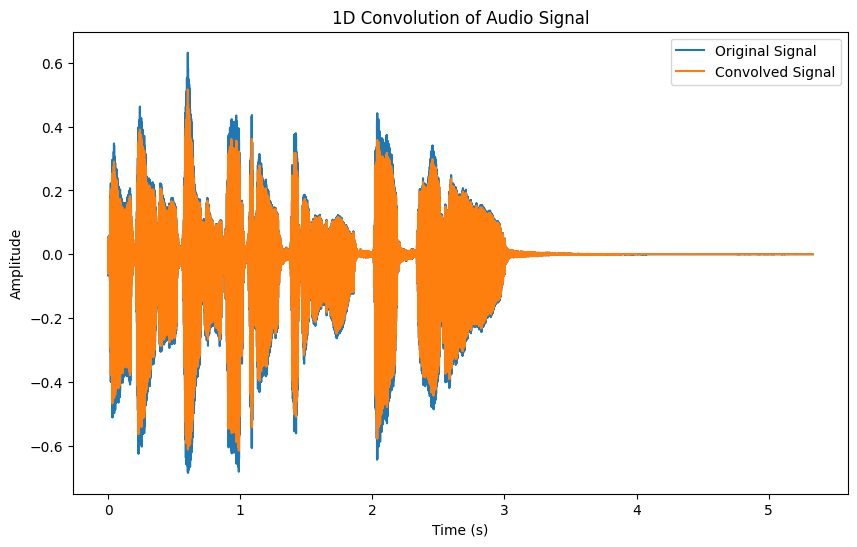

In [15]:
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

# Load the audio file
filename = librosa.ex('trumpet')
sinal, taxa_amostragem = librosa.load(filename)

# Define the convolution kernel (e.g., low-pass filter)
kernel = np.array([1, 1, 1]) / 3  # Simple moving average filter

# Perform the 1D convolution
convolved_signal = np.convolve(sinal, kernel, mode='same')

# Plot the original and convolved signals
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(sinal)) / taxa_amostragem, sinal, label='Original Signal')
plt.plot(np.arange(len(convolved_signal)) / taxa_amostragem, convolved_signal, label='Convolved Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('1D Convolution of Audio Signal')
plt.legend()
plt.show()


In [9]:
ipd.Audio(sinal, rate=taxa_amostragem)


In [14]:

ipd.Audio(convolved_signal, rate=taxa_amostragem)

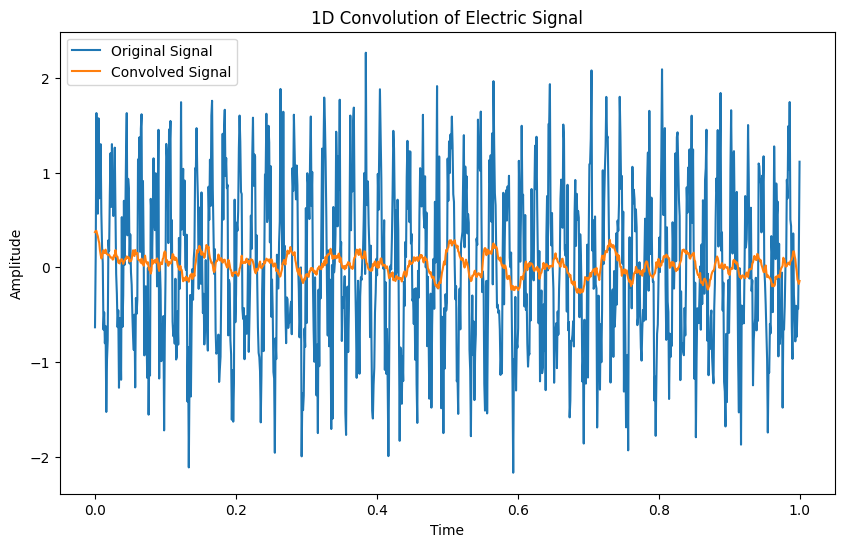

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate electric signal
num_samples = 1000
time = np.linspace(0, 1, num_samples)
electric_signal = np.sin(2 * np.pi * 50 * time) + 0.5 * np.random.randn(num_samples)

# Define the convolution kernel
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size

# Perform the 1D convolution
convolved_signal = np.convolve(electric_signal, kernel, mode='same')

# Plot the original and convolved signals
plt.figure(figsize=(10, 6))
plt.plot(time, electric_signal, label='Original Signal')
plt.plot(time, convolved_signal, label='Convolved Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('1D Convolution of Electric Signal')
plt.legend()
plt.show()

## Sistemas Lineares Invariantes no espaço